Import prices

In [1]:
import yfinance as yf

msft = yf.Ticker("MSFT")

hist = msft.history(period="1y")

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-29,180.98,182.50,178.68,181.49,42130400,0.0,0
2020-06-01,180.79,181.25,179.72,181.08,22622400,0.0,0
2020-06-02,182.48,183.23,179.61,183.14,30794600,0.0,0
2020-06-03,183.05,184.16,181.82,183.58,27311000,0.0,0
2020-06-04,182.53,184.06,180.55,181.17,28761800,0.0,0
...,...,...,...,...,...,...,...
2021-05-24,247.79,251.16,247.51,250.78,21411500,0.0,0
2021-05-25,251.77,252.75,250.82,251.72,17704300,0.0,0
2021-05-26,251.43,252.94,250.75,251.49,17771600,0.0,0


Window prices into 30 day windows

In [2]:
import numpy as np

def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

window_data = rolling_window(hist['Close'].values, 30)

window_data

array([[181.49, 181.08, 183.14, ..., 210.79, 212.26, 211.62],
       [181.08, 183.14, 183.58, ..., 212.26, 211.62, 205.08],
       [183.14, 183.58, 181.17, ..., 211.62, 205.08, 206.35],
       ...,
       [258.9 , 260.14, 258.14, ..., 250.78, 251.72, 251.49],
       [260.14, 258.14, 257.67, ..., 251.72, 251.49, 249.31],
       [258.14, 257.67, 259.98, ..., 251.49, 249.31, 249.68]])

In [4]:
from statsmodels.nonparametric.kernel_regression import KernelReg as kr 

result_list = []
for i in window_data[0:3]:
    exog = [i for i in range(0, len(i))]
    regression_result = kr(endog=i, exog=exog, var_type='c', )
    regression_result = regression_result.fit()
    result_list = result_list + [regression_result, ]
print(result_list[0])

(array([180.80554454, 181.65937559, 182.51670859, 183.37726079,
       184.24161662, 185.1110517 , 185.98728277, 186.8721871 ,
       187.76754305, 188.67484144, 189.59520331, 190.52941865,
       191.47809581, 192.4418917 , 193.42178085, 194.4193193 ,
       195.43686276, 196.477703  , 197.54609102, 198.64712129,
       199.78646295, 200.96994413, 202.20302149, 203.4901929 ,
       204.8344276 , 206.23669162, 207.69563305, 209.20746762,
       210.7660743 , 212.36328062]), array([[0.86430536],
       [0.86717584],
       [0.87037813],
       [0.87424648],
       [0.87906992],
       [0.88506373],
       [0.89234786],
       [0.90093772],
       [0.91075232],
       [0.92164277],
       [0.93344047],
       [0.94601971],
       [0.95936287],
       [0.97361238],
       [0.9890925 ],
       [1.00628875],
       [1.02578331],
       [1.04815742],
       [1.07388174],
       [1.10321913],
       [1.13615948],
       [1.17239662],
       [1.2113465 ],
       [1.25219807],
       [1.2939842

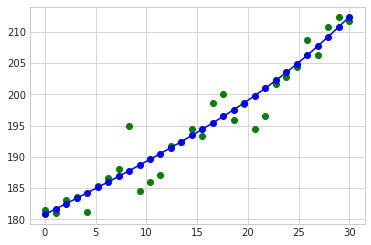

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

y_actual = window_data[0] 
x = np.linspace(0, len(y_actual), len(y_actual))
plt.plot(x, y_actual, 'o', color='green');

plt.plot(x, result_list[0][0], '-o', color='blue');
